# Homework 4 Q1

In [162]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.compose import make_column_transformer
from matplotlib import pyplot as plt
import seaborn as sns

# Task 1: Normalize Features
- HotOneEncode Categorical Columns
- Convert age to numerical value  below21 converts to 16 and 50plus to 55
    - Or convert age to ordinal encoding
- Convert eduction to ordinal encoding 
- Convert income to ordinal encoding
- 
Key Decision: Converting categorical columns with only two outputs to 0 and 1 instead of HotOneEncoding to reduce the number of features (HotOneEncoding would create 2 columns, converting to 0 and 1 doesn't)
Key Decision: How to encode age -> It seems like apart of data collecting, filtering was already done. HotOneEncode will result in the relationship of age being shown in the model. 

Checking to see if there is a correlation between occupation and income to drop occupation

In [163]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

print(df.columns)
# data (as pandas dataframes) 
y = df['Y'] 
x = df.drop(['Y'], axis=1) 

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [164]:
x

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1


In [165]:
y

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Y, Length: 12684, dtype: int64

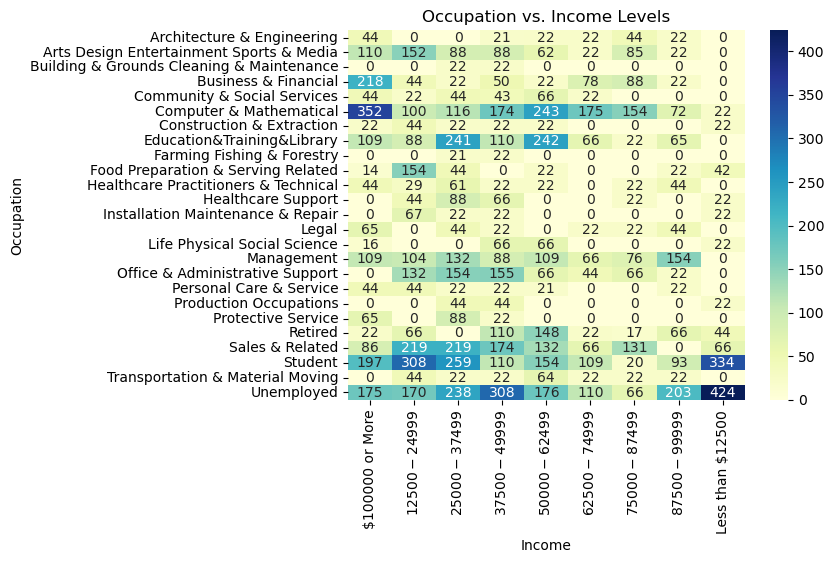

In [166]:
# Cross-tabulate occupation and income
crosstab = pd.crosstab(x['occupation'], x['income'])

# Plot as heatmap
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Occupation vs. Income Levels")
plt.xlabel("Income")
plt.ylabel("Occupation")
plt.show()

In [167]:
x['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [168]:
# Define the order of categories
# Define the order of categories for each column
categories = {
    'age': ['below21', '21', '26', '31', '36', '41', '46', '50plus'],
    'education': ['Some High School', 
                  'High School Graduate', 
                  'Some college - no degree', 
                  'Associates degree', 
                  'Bachelors degree', 
                  'Graduate degree (Masters or Doctorate)'],
    'income': [ 'Less than $12500',
                '$12500 - $24999',
                '$25000 - $37499',
                '$37500 - $49999',
                '$50000 - $62499',
                '$62500 - $74999',
                '$75000 - $87499',
                '$87500 - $99999',
                '$100000 or More']
}
encoder = preprocessing.OrdinalEncoder(categories=[categories['age'], categories['education'], categories['income']])

# Fit and transform the age_group column
x[['age_encoded', 'education_encoded', 'income_encoded']] = encoder.fit_transform(x[['age', 'education', 'income']])
x = x.drop(columns=['age', 'education', 'income'])

# View the original and encoded DataFrame
x

,destination,passanger,weather,temperature,time,coupon,expiration,gender,maritalStatus,has_children,occupation,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,age_encoded,education_encoded,income_encoded
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,Unmarried partner,1,Unemployed,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1.0,2.0,3.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,Unmarried partner,1,Unemployed,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1.0,2.0,3.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,Unmarried partner,1,Unemployed,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1.0,2.0,3.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,Unmarried partner,1,Unemployed,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1.0,2.0,3.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,Unmarried partner,1,Unemployed,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,Single,0,Sales & Related,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,2.0,4.0,6.0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,Single,0,Sales & Related,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,2.0,4.0,6.0
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,Single,0,Sales & Related,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,2.0,4.0,6.0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,Single,0,Sales & Related,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,2.0,4.0,6.0


In [169]:
ct = make_column_transformer(
(preprocessing.OneHotEncoder(sparse_output=False), 
["destination", "passanger", "weather", "temperature", "time", "coupon", "expiration", "gender", "maritalStatus", "occupation", "Bar", "car", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]), 
remainder="passthrough")
ct.set_output(transform="pandas")
x = ct.fit_transform(x)
x

,onehotencoder__destination_Home,onehotencoder__destination_No Urgent Place,onehotencoder__destination_Work,onehotencoder__passanger_Alone,onehotencoder__passanger_Friend(s),onehotencoder__passanger_Kid(s),onehotencoder__passanger_Partner,onehotencoder__weather_Rainy,onehotencoder__weather_Snowy,onehotencoder__weather_Sunny,onehotencoder__temperature_30,onehotencoder__temperature_55,onehotencoder__temperature_80,onehotencoder__time_10AM,onehotencoder__time_10PM,onehotencoder__time_2PM,onehotencoder__time_6PM,onehotencoder__time_7AM,onehotencoder__coupon_Bar,onehotencoder__coupon_Carry out & Take away,onehotencoder__coupon_Coffee House,onehotencoder__coupon_Restaurant(20-50),onehotencoder__coupon_Restaurant(<20),onehotencoder__expiration_1d,onehotencoder__expiration_2h,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__maritalStatus_Divorced,onehotencoder__maritalStatus_Married partner,onehotencoder__maritalStatus_Single,onehotencoder__maritalStatus_Unmarried partner,onehotencoder__maritalStatus_Widowed,onehotencoder__occupation_Architecture & Engineering,onehotencoder__occupation_Arts Design Entertainment Sports & Media,onehotencoder__occupation_Building & Grounds Cleaning & Maintenance,onehotencoder__occupation_Business & Financial,onehotencoder__occupation_Community & Social Services,onehotencoder__occupation_Computer & Mathematical,onehotencoder__occupation_Construction & Extraction,onehotencoder__occupation_Education&Training&Library,onehotencoder__occupation_Farming Fishing & Forestry,onehotencoder__occupation_Food Preparation & Serving Related,onehotencoder__occupation_Healthcare Practitioners & Technical,onehotencoder__occupation_Healthcare Support,onehotencoder__occupation_Installation Maintenance & Repair,onehotencoder__occupation_Legal,onehotencoder__occupation_Life Physical Social Science,onehotencoder__occupation_Management,onehotencoder__occupation_Office & Administrative Support,onehotencoder__occupation_Personal Care & Service,onehotencoder__occupation_Production Occupations,onehotencoder__occupation_Protective Service,onehotencoder__occupation_Retired,onehotencoder__occupation_Sales & Related,onehotencoder__occupation_Student,onehotencoder__occupation_Transportation & Material Moving,onehotencoder__occupation_Unemployed,onehotencoder__Bar_1~3,onehotencoder__Bar_4~8,onehotencoder__Bar_gt8,onehotencoder__Bar_less1,onehotencoder__Bar_never,onehotencoder__Bar_nan,onehotencoder__car_Car that is too old to install Onstar :D,onehotencoder__car_Mazda5,onehotencoder__car_Scooter and motorcycle,onehotencoder__car_crossover,onehotencoder__car_do not drive,onehotencoder__car_nan,onehotencoder__CoffeeHouse_1~3,onehotencoder__CoffeeHouse_4~8,onehotencoder__CoffeeHouse_gt8,onehotencoder__CoffeeHouse_less1,onehotencoder__CoffeeHouse_never,onehotencoder__CoffeeHouse_nan,onehotencoder__CarryAway_1~3,onehotencoder__CarryAway_4~8,onehotencoder__CarryAway_gt8,onehotencoder__CarryAway_less1,onehotencoder__CarryAway_never,onehotencoder__CarryAway_nan,onehotencoder__RestaurantLessThan20_1~3,onehotencoder__RestaurantLessThan20_4~8,onehotencoder__RestaurantLessThan20_gt8,onehotencoder__RestaurantLessThan20_less1,onehotencoder__RestaurantLessThan20_never,onehotencoder__RestaurantLessThan20_nan,onehotencoder__Restaurant20To50_1~3,onehotencoder__Restaurant20To50_4~8,onehotencoder__Restaurant20To50_gt8,onehotencoder__Restaurant20To50_less1,onehotencoder__Restaurant20To50_never,onehotencoder__Restaurant20To50_nan,remainder__has_children,remainder__toCoupon_GEQ5min,remainder__toCoupon_GEQ15min,remainder__toCoupon_GEQ25min,remainder__direction_same,remainder__direction_opp,remainder__age_encoded,remainder__education_encoded,remainder__income_encoded
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [170]:
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    display(x)

,onehotencoder__destination_Home,onehotencoder__destination_No Urgent Place,onehotencoder__destination_Work,onehotencoder__passanger_Alone,onehotencoder__passanger_Friend(s),onehotencoder__passanger_Kid(s),onehotencoder__passanger_Partner,onehotencoder__weather_Rainy,onehotencoder__weather_Snowy,onehotencoder__weather_Sunny,onehotencoder__temperature_30,onehotencoder__temperature_55,onehotencoder__temperature_80,onehotencoder__time_10AM,onehotencoder__time_10PM,onehotencoder__time_2PM,onehotencoder__time_6PM,onehotencoder__time_7AM,onehotencoder__coupon_Bar,onehotencoder__coupon_Carry out & Take away,onehotencoder__coupon_Coffee House,onehotencoder__coupon_Restaurant(20-50),onehotencoder__coupon_Restaurant(<20),onehotencoder__expiration_1d,onehotencoder__expiration_2h,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__maritalStatus_Divorced,onehotencoder__maritalStatus_Married partner,onehotencoder__maritalStatus_Single,onehotencoder__maritalStatus_Unmarried partner,onehotencoder__maritalStatus_Widowed,onehotencoder__occupation_Architecture & Engineering,onehotencoder__occupation_Arts Design Entertainment Sports & Media,onehotencoder__occupation_Building & Grounds Cleaning & Maintenance,onehotencoder__occupation_Business & Financial,onehotencoder__occupation_Community & Social Services,onehotencoder__occupation_Computer & Mathematical,onehotencoder__occupation_Construction & Extraction,onehotencoder__occupation_Education&Training&Library,onehotencoder__occupation_Farming Fishing & Forestry,onehotencoder__occupation_Food Preparation & Serving Related,onehotencoder__occupation_Healthcare Practitioners & Technical,onehotencoder__occupation_Healthcare Support,onehotencoder__occupation_Installation Maintenance & Repair,onehotencoder__occupation_Legal,onehotencoder__occupation_Life Physical Social Science,onehotencoder__occupation_Management,onehotencoder__occupation_Office & Administrative Support,onehotencoder__occupation_Personal Care & Service,onehotencoder__occupation_Production Occupations,onehotencoder__occupation_Protective Service,onehotencoder__occupation_Retired,onehotencoder__occupation_Sales & Related,onehotencoder__occupation_Student,onehotencoder__occupation_Transportation & Material Moving,onehotencoder__occupation_Unemployed,onehotencoder__Bar_1~3,onehotencoder__Bar_4~8,onehotencoder__Bar_gt8,onehotencoder__Bar_less1,onehotencoder__Bar_never,onehotencoder__Bar_nan,onehotencoder__car_Car that is too old to install Onstar :D,onehotencoder__car_Mazda5,onehotencoder__car_Scooter and motorcycle,onehotencoder__car_crossover,onehotencoder__car_do not drive,onehotencoder__car_nan,onehotencoder__CoffeeHouse_1~3,onehotencoder__CoffeeHouse_4~8,onehotencoder__CoffeeHouse_gt8,onehotencoder__CoffeeHouse_less1,onehotencoder__CoffeeHouse_never,onehotencoder__CoffeeHouse_nan,onehotencoder__CarryAway_1~3,onehotencoder__CarryAway_4~8,onehotencoder__CarryAway_gt8,onehotencoder__CarryAway_less1,onehotencoder__CarryAway_never,onehotencoder__CarryAway_nan,onehotencoder__RestaurantLessThan20_1~3,onehotencoder__RestaurantLessThan20_4~8,onehotencoder__RestaurantLessThan20_gt8,onehotencoder__RestaurantLessThan20_less1,onehotencoder__RestaurantLessThan20_never,onehotencoder__RestaurantLessThan20_nan,onehotencoder__Restaurant20To50_1~3,onehotencoder__Restaurant20To50_4~8,onehotencoder__Restaurant20To50_gt8,onehotencoder__Restaurant20To50_less1,onehotencoder__Restaurant20To50_never,onehotencoder__Restaurant20To50_nan,remainder__has_children,remainder__toCoupon_GEQ5min,remainder__toCoupon_GEQ15min,remainder__toCoupon_GEQ25min,remainder__direction_same,remainder__direction_opp,remainder__age_encoded,remainder__education_encoded,remainder__income_encoded
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [ ]:
x_scaler = preprocessing.MinMaxScaler() # preprocessing.StandardScaler()
x = x_scaler.fit_transform(x)
x.shape

array([[0.        , 1.        , 0.        , ..., 0.14285714, 0.4       ,
        0.375     ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.4       ,
        0.375     ],
       [0.        , 1.        , 0.        , ..., 0.14285714, 0.4       ,
        0.375     ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.28571429, 0.8       ,
        0.75      ],
       [0.        , 0.        , 1.        , ..., 0.28571429, 0.8       ,
        0.75      ],
       [0.        , 0.        , 1.        , ..., 0.28571429, 0.8       ,
        0.75      ]])

In [ ]:


kfold = model_selection.KFold(5, shuffle=True, random_state=2)
prec, rec, f1 = [], [], []

mlp_clf = MLPClassifier(hidden_layer_sizes=(10,4,5), max_iter=6000, activation="relu", random_state=2)
x_scaler = preprocessing.MinMaxScaler() # preprocessing.StandardScaler()

for train_idx, test_idx in kfold.split(x):
    x_train, x_test =  x[train_idx], x[test_idx]
    y_train, y_test =  y[train_idx], y[test_idx]

    x_train = x_scaler.fit_transform(x_train)
    x_test = x_scaler.fit_transform(x_test)

    mlp_clf.fit(x_train, y_train)
    
    y_pred = mlp_clf.predict(x_test)
    
    print(y_pred)
    print(y_test)
    
    rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
    prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
    f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]

print("recall", np.mean(rec), np.std(rec))
print("precision", np.mean(prec), np.std(prec))
print("f1", np.mean(f1), np.std(f1))

    

[1 1 0 ... 1 0 1]
4        0
10       1
16       1
21       1
23       0
        ..
12673    0
12675    0
12676    1
12678    0
12680    1
Name: Y, Length: 2537, dtype: int64
[1 0 1 ... 1 1 1]
2        1
3        0
5        1
8        1
11       1
        ..
12660    0
12663    0
12665    1
12666    1
12672    0
Name: Y, Length: 2537, dtype: int64
[1 1 0 ... 0 0 0]
0        1
6        1
13       1
15       0
19       1
        ..
12671    1
12674    0
12681    0
12682    0
12683    0
Name: Y, Length: 2537, dtype: int64


c:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[1 0 1 ... 0 0 0]
7        1
9        0
26       0
34       0
36       0
        ..
12624    1
12631    1
12632    0
12635    0
12638    0
Name: Y, Length: 2537, dtype: int64
[1 0 1 ... 1 1 1]
1        0
12       1
14       1
17       0
24       1
        ..
12655    0
12661    0
12669    1
12677    1
12679    1
Name: Y, Length: 2536, dtype: int64
recall 0.7131036993194725 0.009348227147230916
precision 0.7172734625305512 0.005278984583074357
f1 0.7139025500519722 0.00811839325919407
